# Homework set 5

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 5, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Christos Perchanidis    (14601206)

River Vaudrin           (11877154)

# The global keyword (helpful info for exercise 2)
In exercise 2 you are asked, at some point, to count the number of times a certain function is evaluated. One way of doing this is using a global variable. To change a global variable x from inside a function, the global keyword is used.

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# to change a global variable x from inside a function, use the global keyword
def foo():
    global x
    x = x*2
    
x=4
print("x before:", x) 
foo()
print("x after:", x)

# verify for yourself that omitting the line "global x" produces an error

x before: 4
x after: 8


-----
# Exercise 1 (exercise 6.6(d), 2.5 pts)
**N.B. This is a pen-and-paper exercise. If you prefer you may upload a separate pdf for this exercise and other pen-and-paper exercises. If you do, don't put both files in a single .zip file, upload them both separately.**

Consider the minimization of 
$$
  f(x,y) = x^2 + y^2
$$
subject to
$$
  g(x,y) = xy^2 -1 = 0 .
$$
Determine the critical points of the Lagrangian function for this problem and determine whether each is a constrained minimum, a constrained maximum, or neither.

The Hessians for the given functions are:
$$
H_f(x,y) =
\left[\begin{array}{cc}
2 & 0 \\
0 & 2
\end{array}\right],
\quad
H_g(x,y) =
\left[\begin{array}{cc}
0 & 2y \\
2y & 2x
\end{array}\right]
$$


The gradient for $f$ is:
$$\nabla f(x,y) 
= \left[\begin{array}{c}\frac{\partial f(x,y)}{\partial x} \\\frac{\partial f(x,y)}{\partial y}\end{array}\right]
= \left[\begin{array}{c}\frac{\partial}{\partial x} x^2+y^2 \\\frac{\partial}{\partial y}x^2+y^2\end{array}\right]
= \left[\begin{array}{c} 2x \\ 2y \end{array}\right]$$

The Jacobian matrix of $g(x,y)$ is:
$$J_g(x, y)
= \left[\begin{array}{c}\frac{\partial g(x,y)}{\partial x} && \frac{\partial g(x,y)}{\partial y}\end{array}\right]
= \left[\begin{array}{c}\frac{\partial}{\partial x} xy^2 -1 && \frac{\partial}{\partial y}xy^2 -1\end{array}\right]
=\left[\begin{array}{ll}y^2 && 2 x y\end{array}\right]$$

The gradient of the *Lagrangian function* is:
$$\nabla \mathcal{L}(x, y, \lambda)
=\left[\begin{array}{c}
\nabla_{x,y} \mathcal{L}(x,y, \lambda) \\
\nabla_\lambda \mathcal{L}(x, y, \lambda)
\end{array}\right]
=\left[\begin{array}{c}
\nabla f(x, y)+J_g^T(x, y) \lambda \\
g(x,y)
\end{array}\right]
=\left[\begin{array}{c} 2 x+\lambda y^2 \\ 2 y+2 \lambda x y \\ x y^2-1
\end{array}\right]
=0$$

Now we should solve the obtained system of equations:

$$
\begin{cases}
2x+\lambda y^2=0\\
2y+2 \lambda xy=0\\
xy^2-1=0
\end{cases}=

\begin{cases}
\lambda = \frac{-2x}{y^2}\\
2y(1+ \lambda x)=0\\
y=\pm \sqrt \frac{1}{x}
\end{cases}=

\begin{cases}
\lambda = -2x^2\\
\pm 2 x^{-\frac{1}{2}} (1-2x^3)=0\\
y=\pm x^{-\frac{1}{2}}
\end{cases}

$$

Let's focus on the second equation

$$
\pm 2 x^{-\frac{1}{2}} (1-2x^3)=0 \Longrightarrow \frac{\pm 2(1-2x^3)}{x^{\frac{1}{2}}}=0 \Longrightarrow 1-2x^3=0 \Longrightarrow x^3=\frac{1}{2} \Longrightarrow x=\frac{1}{\sqrt[3]{2}}
$$

With found value for $x$ we proceed in the original system

$$
\begin{cases}
\lambda = -2x^2\\
x=\frac{1}{\sqrt[3]{2}}\\
y=\pm x^{-\frac{1}{2}}
\end{cases}=

\begin{cases}
\lambda = -\frac{2}{2^{\frac{2}{3}}}\\
x=\frac{1}{\sqrt[3]{2}}\\
y=\pm (\frac{1}{2^{\frac{1}{3}}})^{-\frac{1}{2}}
\end{cases}=

\begin{cases}
\lambda = -2^\frac{3}{3} * 2^{-\frac{2}{3}}\\
x=\frac{1}{\sqrt[3]{2}}\\
y=\pm 2^{\frac{1}{6}}
\end{cases}=

\begin{cases}
\lambda = -2^\frac{1}{3}\\
x=\frac{1}{\sqrt[3]{2}}\\
y=\pm \sqrt[6]{2}
\end{cases}=

\begin{cases}
\lambda = -\sqrt[3]{2}\\
x=\frac{1}{\sqrt[3]{2}}\\
y=\pm \sqrt[6]{2}
\end{cases}

$$

We have found two critical points of the Lagrangian function, which are:
$
(x=\frac{1}{\sqrt[3]{2}},
y=\sqrt[6]{2},
\lambda = -\sqrt[3]{2}),
(x=\frac{1}{\sqrt[3]{2}},
y=-\sqrt[6]{2},
\lambda = -\sqrt[3]{2}).
$
To confirm the optimality of these solutions, we compute:


$$
B(x, y, \lambda)
= H_f(x,y)+\sum_{i=1}^m \lambda_i H_{g_i}(x,y)
=\left[\begin{array}{cc} 2 & 0 \\ 0 & 2
\end{array}\right] +
\left[\begin{array}{cc} \lambda * 0 & \lambda * 2y \\ \lambda * 2 y & \lambda * 2x
\end{array}\right]
=\left[\begin{array}{cc} 2 & 2 \lambda y \\ 2 \lambda y & 2+2 \lambda x
\end{array}\right]
$$

From an orthogonal factorization of $J_g(x, y)^T$ we obtain a null vector:
$$z(x,y) 
= \left[\begin{array}{c} 2x \\ -y \end{array}\right]
$$

Now we can evaluate our points:
$$
z^{T} B z
=\left[\begin{array}{c} 2x & -y \end{array}\right]
\left[\begin{array}{cc} 2 & 2 \lambda y \\ 2 \lambda y & 2+2 \lambda x
\end{array}\right]
\left[\begin{array}{c} 2x \\ -y \end{array}\right]
=\left[\begin{array}{c} 4x - 2y^2 \lambda & 2xy \lambda - 2y \end{array}\right]
\left[\begin{array}{c} 2x \\ -y \end{array}\right]
=8x^2+2y^2-6xy^2\lambda
$$

For $(x=\frac{1}{\sqrt[3]{2}}, y=\sqrt[6]{2}, \lambda = -\sqrt[3]{2})$ we have:
$8x^2+2y^2-6xy^2\lambda = 8 * 2^{-\frac{2}{3}} + 2*2^{\frac{1}{3}} + 6*2^{\frac{1}{3}} \approx 15.12$, thus it is a constrained minimum.

For $(x=\frac{1}{\sqrt[3]{2}}, y=-\sqrt[6]{2}, \lambda = -\sqrt[3]{2})$ we have:
$8x^2+2y^2-6xy^2\lambda = 8 * 2^{-\frac{2}{3}} + 2*2^{\frac{1}{3}} + 6*2^{\frac{1}{3}} \approx 15.12$, thus it is a constrained minimum.


---
# Exercise 2

## (a) (1 point)
The Rosenbrock function is given by

$$
f(x,y) = 100 (y-x^2)^2 + (1-x)^2
$$

What is the gradient of $f$? Show that there is exactly one local minimum point and determine this point (N.B. this is a pen-and-paper exercise.)

The gradient for $f$ is:

$$\nabla f(x,y) 
= \left[\begin{array}{c}\frac{\partial f(x,y)}{\partial x} \\\frac{\partial f(x,y)}{\partial y}\end{array}\right]
= \left[\begin{array}{c}\frac{\partial}{\partial x} 100 (y-x^2)^2 + (1-x)^2 \\\frac{\partial}{\partial y}100 (y-x^2)^2 + (1-x)^2\end{array}\right]
=\left[\begin{array}{c} -400x(y-x^2)-2(1-x) \\ 200(y-x^2) \end{array}\right]$$

The local minimum can be found by solving:

$$\nabla f(x,y) = \left[\begin{array}{c} -400x(y-x^2)-2(1-x) \\ 200(y-x^2) \end{array}\right] =  \left[\begin{array}{c}0 \\ 0\end{array}\right]$$

First we solve our first equation to obtain $y$:

$$-400x(y-x^2)-2(1-x)=0$$
$$-400x(y-x^2)=2(1-x)$$
$$\frac{-400x(y-x^2)}{-400x}=\frac{2(1-x)}{-400x}$$
$$y-x^2=-\frac{-x+1}{200x}$$
$$y=-\frac{-x+1}{200x}+x^2$$

Then we substitute $y$ into our second equation:

$$200(-\frac{-x+1}{200x}+x^2-x^2)$$
$$=-\frac{-x+1}{x}$$

And solve: 

$$-\frac{-x+1}{x}=0$$

To obtain:

$$x=1$$

Then we sustitute $x$ in our equation for $y$:

$$y=-\frac{-1+1}{200*1}+1^2$$

Which gives us:

$$y=1$$

Thus our local minimum point is $(1,1)$.

## (b) (2 points)
Implement the method of steepest descent. Use `scipy.optimize.line_search` as line search method.

Test your method on the Rosenbrock function starting from $(x,y) = (0,0)$.
Plot the convergence to the minimum: Make a plot of the convergence in the $(x,y)$ plane as well as plot of the norm of the error as a function of the step number.


In [2]:
''' 
    Rosenbrock function 
    f(x,y)=(a-x)^{2} + b(y-x^{2})^{2} with a=1, b=100
    AND 
    Gradient of Rosenbrock function
'''
def rosenbrock(X):
    a=1
    b=100
    x, y = X
    global function_evals
    function_evals += 1
    return (a - x)**2 + b * (y - x**2)**2

def rosenbrock_grad(X):
    a=1
    b=100
    x, y = X
    global gradient_evals
    gradient_evals += 1
    return np.array([2 * (x - a) - 4 * b * x * (y - x**2), 2 * b * (y - x**2)])

function_evals = 0
gradient_evals = 0

In [5]:
def steepestDescent(x0, K):
    ''' 
        Steepest Descent method for unconstrained optimization
    '''
    # initial guess
    x = x0
    
    for i in range(K):

        # compute negative gradient
        s = -rosenbrock_grad(x) 

        # perform line search to find alpha
        result = scipy.optimize.line_search(rosenbrock, rosenbrock_grad, x.reshape(1,2)[0], s.reshape(1,2)[0])
        a = result[0]

        # check if alpha is not none
        if a == None:
            print("No alpha could be found after {} iterations!\n".format(i))
            break

        # update solution
        x = x + a*s

        global steepestDescent_runs
        steepestDescent_runs += 1

        global steepestDescent_solutions
        steepestDescent_solutions.append(x)

        global steepestDescent_errors
        current_err = np.linalg.norm(x-x_target)
        steepestDescent_errors.append(current_err)

        if current_err < 10**-5: 
            print("Stopping criterion has been reahced after {} iterations!\n".format(i+1))
            return x, i
        
    return x, i


x_target = np.ones([2,1])
x0 = np.zeros([2,1])
iters = 10000

steepestDescent_runs = 0
steepestDescent_solutions = []
steepestDescent_errors = []

print("Initial Guess:\nx0={}\n".format(x0))
s, i = steepestDescent(x0, iters)
print("After {} iterations our steepestDecent implmentation returned this solution for Rosenbrock Function with a=1 and b=100:\nx={}".format(i+1, s))

Initial Guess:
x0=[[0.]
 [0.]]

Stopping criterion has been reahced after 6941 iterations!

After 6941 iterations our steepestDecent implmentation returned this solution for Rosenbrock Function with a=1 and b=100:
x=[[0.99999555]
 [0.99999105]]


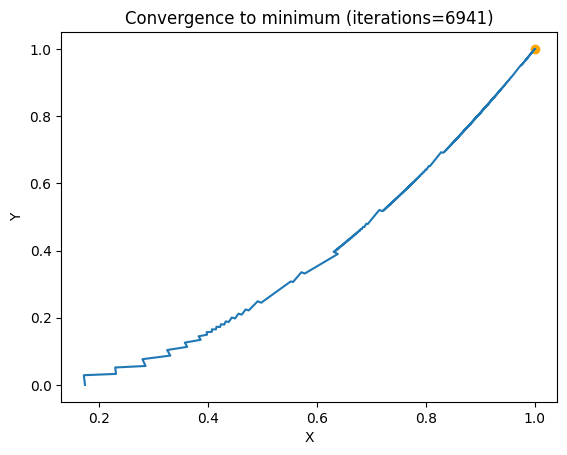

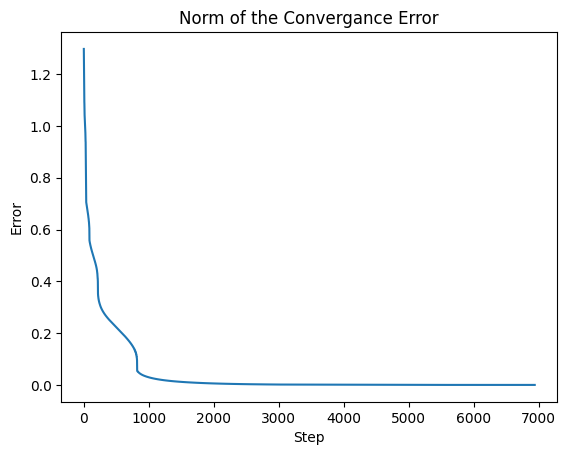

In [6]:
# Plot of Solutions
plt.title("Convergence to minimum (iterations={})".format(i+1))
plt.xlabel("X")
plt.ylabel("Y")
x = []
y = []
for i in range (len(steepestDescent_solutions)):
    x.append(steepestDescent_solutions[i][0])
    y.append(steepestDescent_solutions[i][1])
plt.plot(x, y)
plt.scatter(x_target[0], x_target[1], c="orange")   # Target Value
plt.show()

# Plot of Error
plt.title("Norm of the Convergance Error")
plt.xlabel("Step")
plt.ylabel("Error")
plt.plot(range(i+1), steepestDescent_errors)
plt.show()

## (c) (1.5 points)

Implement the BFGS method for unconstrained optimization, given in Heath chapter 6. Test the correctness of the code using the data in Example 6.13.

In [7]:
''' 
    Function from Heath example 6.13
    AND
    Gradient of that function
'''
def F(x):
    return 0.5 * x[0]**2 + 2.5 * x[1]**2
def grad_F(x):
    return np.array([x[0], 5*x[1]])

In [8]:
def BFGS(x0, B0, K, func=F):
    ''' 
        BFSG method for unconstrained optimization
    '''
    # define functions
    if func==F:
        grad = grad_F
    elif func==rosenbrock:
        grad=rosenbrock_grad

    # initial guess
    x = x0
    # initial Hessian approx.
    B = B0
    # initial y
    y = np.zeros([1,len(x)])
    for k in range(K):
        # compute gradient of x_k
        Fx_k = grad(x)
        # compute quasi-Newton step
        s = np.linalg.solve(B, -Fx_k)

        # update solution 
        x = x + s

        # compute gradient of x_k+1
        Fx_k1 = grad(x)
        # compute y_k
        y = Fx_k1 - Fx_k
        
        # stop if y=0 or s=0
        if np.all(y==0) and np.all(s==0):
            break
        # update Hessian
        B = B + (y@y.T)/(y.T@s) - (B@s@s.T@B)/(s.T@B@s)

        global BFGS_runs
        BFGS_runs += 1

        global BFGS_solutions
        BFGS_solutions.append(x)

        if func==rosenbrock:
            global BFGS_errors
            current_err = np.linalg.norm(x-x_target)
            BFGS_errors.append(current_err)
            
            if current_err < 10**-5: 
                print("Stopping criterion has been reahced after {} iterations!\n".format(k+1))
                return x, B, k

    return x, B, k

iters = 5
BFGS_runs = 0
BFGS_solutions = []
BFGS_errors = []

x0 = np.array([[5],[1]])
B0 = np.identity(len(x0))
x, B, k = BFGS(x0, B0, iters, func=F)

print("Initial Guess:\n{}".format(x0))
print("Initial Hessian:\n{}\n".format(B0))
print("After {} iteration our BFGS implementation returned this solution for F(x):\nx={}\n AND \nB={}\n".format(iters, x, B))
print("These results are the same as the ones in the book, thus our implementation is correct!")

Initial Guess:
[[5]
 [1]]
Initial Hessian:
[[1. 0.]
 [0. 1.]]

After 5 iteration our BFGS implementation returned this solution for F(x):
x=[[-0.00054233]
 [ 0.00092339]]
 AND 
B=[[0.98572644 0.00756122]
 [0.00756122 4.99599455]]

These results are the same as the ones in the book, thus our implementation is correct!


## (d) (1 points)

Apply your implementation of the BFGS method to find a local minimum of the Rosenbrock function (see previous exercise). Use starting point $(0,0)$ and do not assume any knowledge of the Hessian when you choose $B_0$.
Plot the convergence to the minimum.

In [10]:
iters = 50
BFGS_runs = 0
BFGS_solutions = []
BFGS_errors = []

x0 = np.zeros([2,1])
B0 = np.identity(len(x0))
print("Initial Guess:\n{}".format(x0))
print("Initial Hessian:\n{}\n".format(B0))
x, B, i = BFGS(x0, B0, iters, func=rosenbrock)
print("After {} iteration our BFGS implementation came up with this solution rosenbrock(x): \nx={}\n AND \nB={}".format(i+1, x, B))

Initial Guess:
[[0.]
 [0.]]
Initial Hessian:
[[1. 0.]
 [0. 1.]]

Stopping criterion has been reahced after 46 iterations!

After 46 iteration our BFGS implementation came up with this solution rosenbrock(x): 
x=[[0.9999957]
 [0.999992 ]]
 AND 
B=[[ 786.99760593 -393.30832461]
 [-393.30832461  197.01619996]]


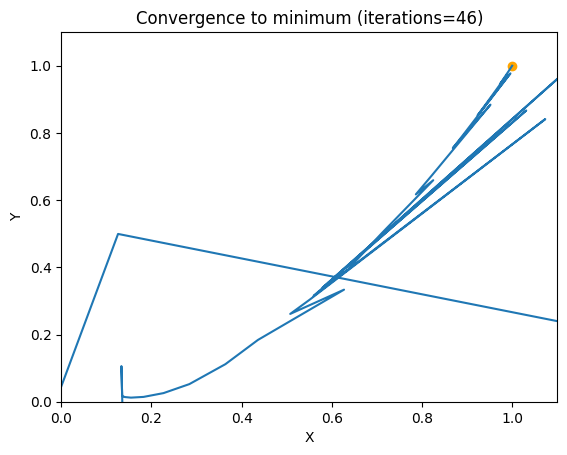

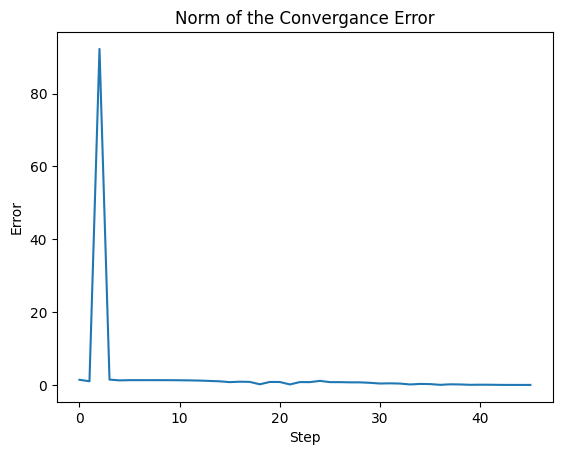

In [11]:
# Plot of Solutions
plt.title("Convergence to minimum (iterations={})".format(i+1))
plt.xlabel("X")
plt.ylabel("Y")
x = []
y = []
for i in range (len(BFGS_solutions)):
    x.append(BFGS_solutions[i][0])
    y.append(BFGS_solutions[i][1])
plt.plot(x, y)
plt.scatter(x_target[0], x_target[1], c="orange")   # Target Value
plt.ylim(0,1.1)
plt.xlim(0,1.1)
plt.show()

# Plot of Error
plt.title("Norm of the Convergance Error")
plt.xlabel("Step")
plt.ylabel("Error")
plt.plot(range(i+1), BFGS_errors)
plt.show()

## (e) (1 point)
How does the convergence compare to that of gradient descent (see
previous question)? Let your program count the number of function and gradient evaluations and
consider this in your comparison. Implement a stopping criterion in both methods that runs until $||x_k-x^*||_2 < 10^{-5}$.

In [12]:
steepestDescent_runs = 0
steepestDescent_solutions = []
steepestDescent_errors = []
function_evals = 0
gradient_evals = 0

iters = 100_000     # Just a big number
x_target = np.ones([2,1])

x0 = np.zeros([2,1])
steepestDescent(x0, iters)

print("To get the optimal solution Steepest Decent ran ", steepestDescent_runs, "times.")
print("With ", function_evals ," function evaluations, and ", gradient_evals , " gradient evaluations.")
print()



BFGS_runs = 0
BFGS_solutions = []
BFGS_errors = []
function_evals = 0
gradient_evals = 0

x0 = np.zeros([2,1])
B0 = np.identity(len(x0))
BFGS(x0, B0, iters, func=rosenbrock)

print("To get the optimal solution BFGS ran for: ", BFGS_runs, "times.")
print("With ", function_evals ," function evaluations, and ", gradient_evals , " gradient evaluations.")

Stopping criterion has been reahced after 6941 iterations!

To get the optimal solution Steepest Decent ran  6941 times.
With  61588  function evaluations, and  20825  gradient evaluations.

Stopping criterion has been reahced after 46 iterations!

To get the optimal solution BFGS ran for:  46 times.
With  0  function evaluations, and  92  gradient evaluations.


Clearly BFGS converges much faster than Steepest Decent. Even though, gradient is calculated twice in each run of function, we can see how overall less evaluations are performed and a much better results is obtained. It can be seen how BFGS loses its track because of not good initial Hessian, but manages to find the correct way fast. Like most secant updating methods, BFGS has a superlinear convergence rate. Meanwhile, Steepest Decent very slowly converges onto solution with the linear rate. We can see how Steepest Descent zigzags back and forth, making very slow progress toward a solution and at the end.